In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
ufo = pd.read_csv('./data/scrubbed.csv',low_memory=False)

**Cleaning the Data**

In [4]:
ufo.columns

Index(['datetime', 'city', 'state', 'country', 'shape', 'duration (seconds)',
       'duration (hours/min)', 'comments', 'date posted', 'latitude',
       'longitude '],
      dtype='object')

*.this columns contains both '24:00' and '00:00' values but only 00:00 are relevant<br>
*.we are going to find the value '24:00' and replace them with the "00:00" value<br>
*.then we convert str type to TimeStamp

In [8]:
ufo['datetime']=ufo['datetime'].replace({'24:00':'00:00'}, regex=True)

In [9]:
ufo['datetime'] = pd.to_datetime(ufo['datetime'])

In [11]:
typos = []
row = -1
for el in ufo['duration (seconds)']:
    row +=1
    if type(el) ==float:
        continue
    for char in el:
        if char.isnumeric() or char == ".":
            continue
        else:
            typos.append((row,el))
            break
typos

[(27822, '2`'), (35692, '8`'), (41201, '2631600  '), (58591, '0.5`')]

In [15]:
correct = {27822:'2', 35692: '8', 41201: '2631600', 58591: '0.5'}

In [16]:
for k, v in correct.items():
    ufo.loc[k, 'duration (seconds)'] = v

In [17]:
ufo['duration_sec'] = ufo['duration (seconds)'].astype(float)

In [18]:
ufo['latitude'].astyep(float)

AttributeError: 'Series' object has no attribute 'astyep'

In [19]:
row = -1
container = []
for i in ufo['latitude']:
    row +=1
    try:
        float(i)
    except ValueError:
        container.append((i,row))

In [20]:
container

[('33q.200088', 43782)]

In [21]:
for c, v in enumerate(ufo.columns.values):
    print(c,'--->',v)

0 ---> datetime
1 ---> city
2 ---> state
3 ---> country
4 ---> shape
5 ---> duration (seconds)
6 ---> duration (hours/min)
7 ---> comments
8 ---> date posted
9 ---> latitude
10 ---> longitude 
11 ---> duration_sec


In [22]:
ufo.iloc[43782,9] = '33.200088'

In [23]:
ufo['latitude'] = ufo['latitude'].astype(float)

In [24]:
ufo.columns.values

array(['datetime', 'city', 'state', 'country', 'shape',
       'duration (seconds)', 'duration (hours/min)', 'comments',
       'date posted', 'latitude', 'longitude ', 'duration_sec'],
      dtype=object)

In [27]:
ufo.columns.values[8] = 'longitude'

In [28]:
ufo['longitude'] = ufo['longitude '].astype(float)

In [29]:
ufo.isnull().values

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [30]:
ufo.isnull().sum()

datetime                   0
city                       0
state                   5797
country                 9670
shape                   1932
duration (seconds)         0
duration (hours/min)       0
comments                  15
longitude                  0
latitude                   0
longitude                  0
duration_sec               0
longitude                  0
dtype: int64

**replacing Nan with unknown and no description values :**

In [31]:
ufo['state'] = ufo['state'].fillna('unknown')
ufo['country'] = ufo['country'].fillna('unknown')
ufo['shape'] = ufo['shape'].fillna('unknown')
ufo['comments'] = ufo['comments'].fillna('unknown')

In [32]:
ufo.drop(['duration (hours/min)', 'duration (seconds)'],axis=1,inplace=True)

In [33]:
ufo['duration_min'] =ufo['duration_sec']/60

# Exploratory Data Analysis

<h2>UFO Witnessess Over Time <h2?

In [34]:
ufo['year'] = ufo['datetime'].dt.year.astype(int)
temp = ufo['year'].value_counts().sort_index()

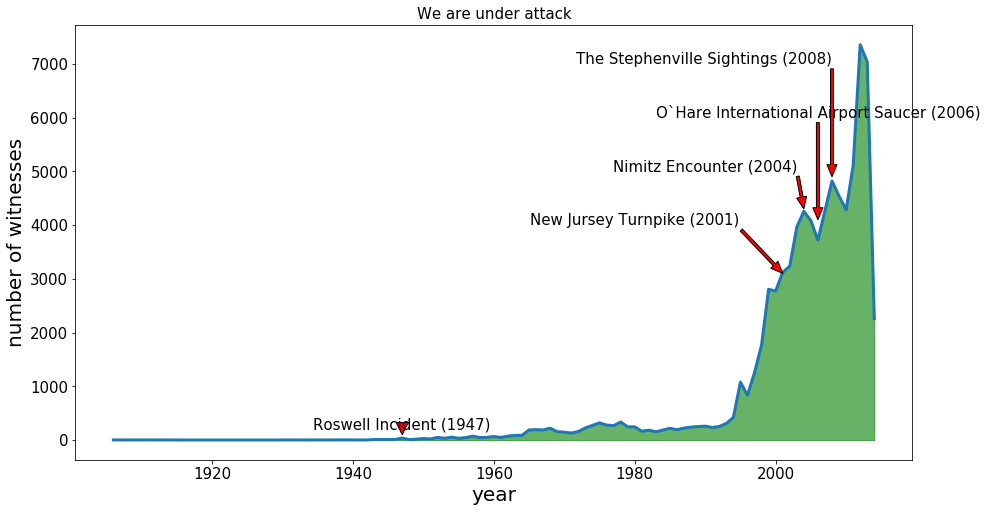

In [35]:
fig = plt.figure(figsize=(15,8))
plt.plot(temp,lw=3)
plt.fill_between(temp.index,temp,color='green',alpha=0.6)

plt.annotate("Roswell Incident (1947)",xy=(1947,100),xytext=(1947,200),size=15,
            horizontalalignment='center',
            arrowprops=dict(facecolor='red'))

plt.annotate('New Jursey Turnpike (2001)',xy=(2001,3100),xytext=(1980,4000),size=15,
            horizontalalignment='center',
            arrowprops=dict(facecolor='red',width=3,headwidth=10))

plt.annotate('Nimitz Encounter (2004)',xy=(2004,4300),xytext=(1990,5000),size=15,
            horizontalalignment='center',
            arrowprops=dict(facecolor='red',width=3,headwidth=10))

plt.annotate('O`Hare International Airport Saucer (2006)',xy=(2006,4100),xytext=(2006,6000),size=15,
            horizontalalignment='center',
            arrowprops=dict(facecolor='red',width=3,headwidth=10))

plt.annotate("The Stephenville Sightings (2008)", xy=(2008, 4900), xytext=(2008, 7000), size=15,
             horizontalalignment='right',
             arrowprops=dict(facecolor="red", width=3, headwidth=10))

plt.xlabel("year",fontsize=20)
plt.ylabel("number of witnesses",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("We are under attack",fontsize=15)
plt.savefig("1_ufo_witnesses_over_time.png", fmt="png")
plt.savefig("1_ufo_witnesses_over_time.jpg", fmt="jpg")

**How X-files TV show and movies starring aliens influence the number of UFO witnesses**

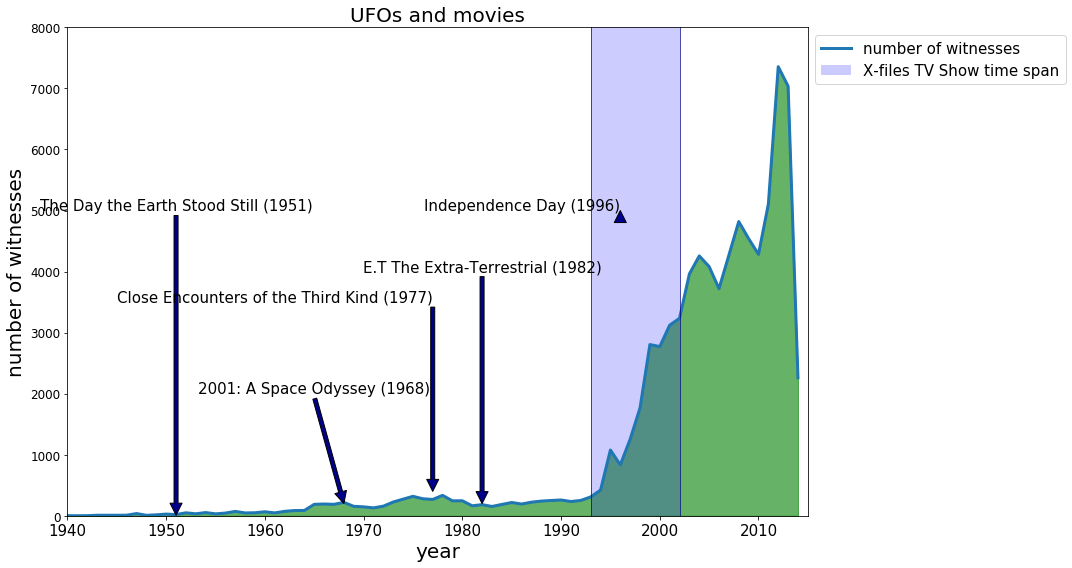

In [36]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout':True})
fig = plt.figure(figsize=(15,8))
plt.plot(temp,lw=3,label='number of witnesses')
plt.fill_between(temp.index,temp,color='green',alpha=0.6)

plt.axvline(1993,lw=1,color='darkblue',alpha=0.7)
plt.axvline(2002,lw=1,color='darkblue',alpha=0.7)

x = [1993,1993,2002,2002]
y = [0,8000,8000,0]


plt.fill(x,y,'b',alpha=0.2,label='X-files TV Show time span')

plt.annotate("""E.T The Extra-Terrestrial (1982)""",xy=(1982,200),xytext=(1982,4000),size=15,
            horizontalalignment='center',
            arrowprops=dict(facecolor='darkblue'))

plt.annotate("Independence Day (1996)",xy=(1996,5000),size=15,horizontalalignment='right',arrowprops=dict(facecolor='darkblue'))
plt.annotate("The Day the Earth Stood Still (1951)", xy=(1951, 10), xytext=(1951, 5000), size=15,
             horizontalalignment='center',
             arrowprops=dict(facecolor="darkblue"))

plt.annotate("Close Encounters of the Third Kind (1977)", xy=(1977, 400), xytext=(1977, 3500), size=15,
             horizontalalignment='right',
             arrowprops=dict(facecolor="darkblue"))

plt.annotate("2001: A Space Odyssey (1968)", xy=(1968, 200), xytext=(1965, 2000), size=15,
             horizontalalignment='center',
             arrowprops=dict(facecolor="darkblue"))
     
plt.legend(bbox_to_anchor=(1.0, 1.0), prop={'size': 15})
plt.xlabel("year", fontsize=20)
plt.ylabel("number of witnesses", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.title("UFOs and movies", fontsize=20)
plt.ylim(0, 8000)
plt.xlim(1940, 2015)
#plt.show()
plt.savefig("1_ufo_witnesses_over_time_movies.png", fmt="png")
plt.savefig("1_ufo_witnesses_over_time_movies.jpg", fmt="jpg")
             

# UFO of Various Shape 

In [37]:
temp = ufo['shape'].value_counts().sort_values(ascending=False)

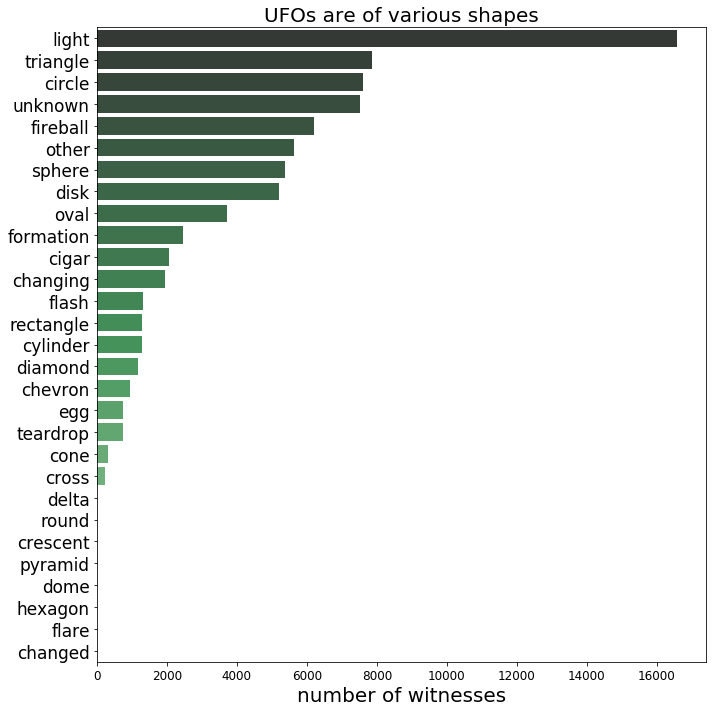

In [38]:
plt.figure(figsize=(10,10))
sns.barplot(temp,temp.index,palette='Greens_d')
plt.yticks(fontsize=17)
plt.xticks(fontsize=12)
plt.xlabel('number of witnesses',fontsize=20)
plt.title('UFOs are of various shapes',fontsize=20)
plt.savefig("2_UFOs_are_of_various_shapes.png", fmt="png")
plt.savefig("2_UFOs_are_of_various_shapes.jpg", fmt="jpg")

# Shapes over years. "Rise of Unknowns" and "Light Prevalence" phenomena

Here we plot the shapes upon the time scale.

You can clearly observe the pike in the unknown shape. Let's call it: "The Rise of Unknowns". Further studies are needed to investigate this phenomenon. Perhaps, we just don't have enough data, or UFO's were so careful, so that people couldn't grasp their shape.

The second investigation is the prevalence of the light. Which is an issue as well

In [39]:
shape_year = ufo[['shape','year']]

In [40]:
from plotly import __version__


In [41]:
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

In [42]:
data = []
for ufo_shape in temp.index[:]:
    df = pd.DataFrame(shape_year.loc[ufo['shape']== ufo_shape,'year'])
    shape = df['year'].value_counts()
    shape.sort_index(ascending=True,inplace=True)
    trace = go.Scatter(x=shape.index,y=shape,mode='lines',name=ufo_shape)
    data.append(trace)
    
iplot(data)

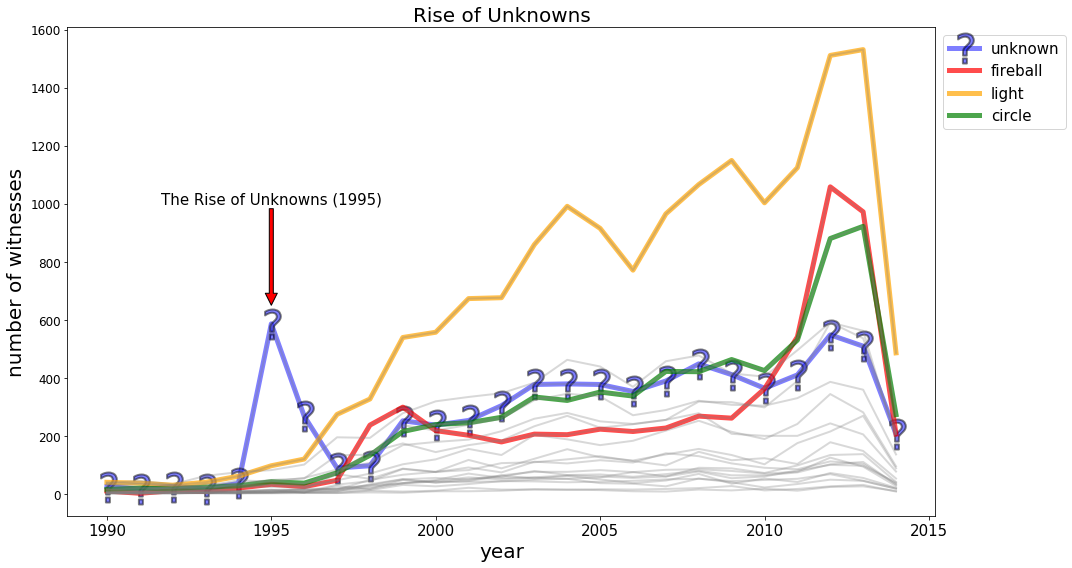

In [43]:
plt.figure(figsize=(15,8))

unk = pd.DataFrame(shape_year.loc[ufo['shape']=='unknown','year'])
unk = unk['year'].value_counts()
unk.sort_index(ascending=True,inplace=True)
plt.plot(unk.loc[1990:],label='unknown',lw=5,alpha=0.5,c='blue',marker='$?$',ms='30',markeredgewidth=2,markeredgecolor='black')

fire = pd.DataFrame(shape_year.loc[ufo['shape']=='fireball','year'])
fire = fire['year'].value_counts()
fire.sort_index(ascending=True,inplace=True)
plt.plot(fire.loc[1990:],label='fireball',lw=5,alpha=0.7,c='red')

light = pd.DataFrame(shape_year.loc[ufo['shape']=='light','year'])
light = light['year'].value_counts()
light.sort_index(ascending=True,inplace=True)
plt.plot(light.loc[1990:],label='light',lw=5,alpha=0.7,c='orange')

circle = pd.DataFrame(shape_year.loc[ufo['shape'] == 'circle', 'year'])
circle = circle['year'].value_counts()
circle.sort_index(ascending=True, inplace=True)   
plt.plot(circle.loc[1990:], label='circle', lw=5, alpha=0.7, c='green')

for ufo_shape in temp.index[:21]:
    df = pd.DataFrame(shape_year.loc[ufo['shape']== ufo_shape,'year'])
    shape = df['year'].value_counts()
    shape.sort_index(ascending=True,inplace=True)
    plt.plot(shape.loc[1990:],lw=2,c='grey',alpha=0.3)
    
plt.annotate('The Rise of Unknowns (1995)',xy=(1995,650),xytext=(1995,1000),
            size=15,horizontalalignment='center',
            arrowprops=dict(facecolor='red'))

plt.legend(bbox_to_anchor=(1.0,1.0),fontsize=15)
plt.xlabel('year',fontsize=20)
plt.ylabel('number of witnesses',fontsize=20)
plt.yticks(fontsize=12)
plt.xticks(fontsize=15)
plt.title('Rise of Unknowns',fontsize=20)
plt.savefig("3_Rise_of_Unknowns.png", fmt="png")
plt.savefig("3_Rise_of_Unknowns.jpg", fmt="jpg")

# UFO tryies to land in the USA most often

In [44]:
temp = ufo['country'].value_counts()
temp.sort_values(inplace=True,ascending=False)

In [45]:
x_label = temp.index.values
y_data = temp.tolist()

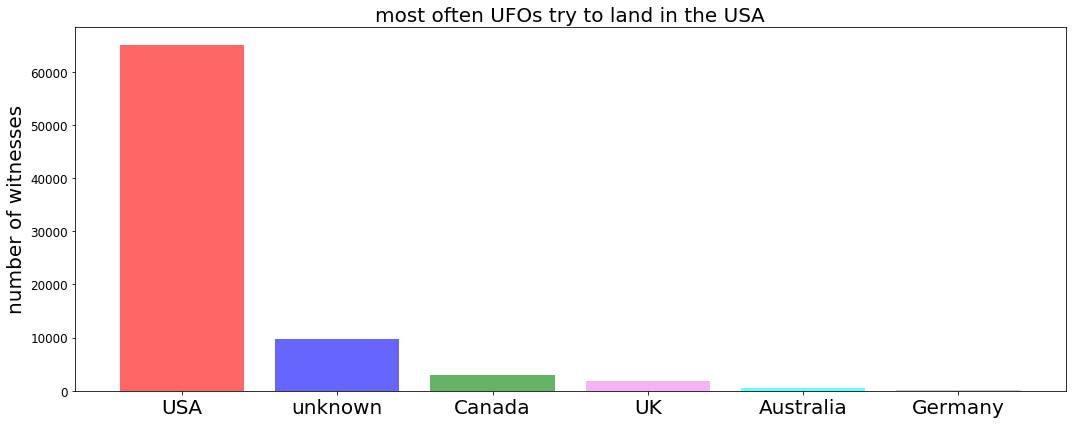

In [46]:
fig = plt.figure(figsize=(15,6))
plt.bar(range(len(x_label)),y_data,color=['red','blue','green','violet','cyan','darkgrey'],alpha=0.6)
plt.xticks(list(range(len(x_label))),['USA','unknown','Canada','UK','Australia','Germany'],fontsize=20)
plt.yticks(fontsize=12)
plt.ylabel('count',fontsize=25)
plt.ylabel('number of witnesses',fontsize=20)
plt.title('most often UFOs try to land in the USA',fontsize=20)
plt.savefig("4_most_often_UFOs_try_to_land_in_the_USA.png", fmt="png")
plt.savefig("4_most_often_UFOs_try_to_land_in_the_USA.jpg", fmt="jpg")

# UFO visit cities mostly in the USA

In [47]:
temp = ufo['city'].value_counts()
temp.sort_values(inplace=True,ascending=False)

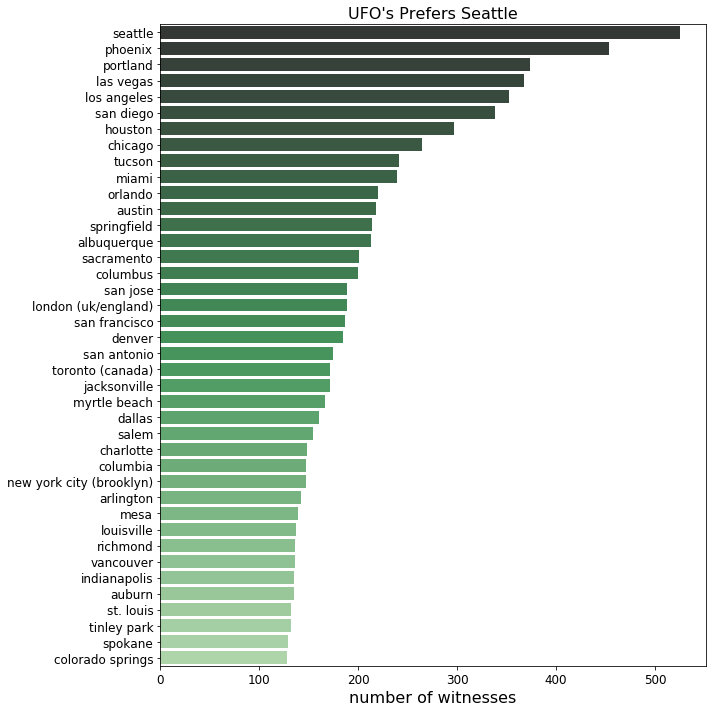

In [48]:
plt.figure(figsize=(10,10))
sns.barplot(temp[:40],temp.index[:40],palette='Greens_d')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.title("UFO's Prefers Seattle",fontsize=16)
plt.xlabel('number of witnesses',fontsize=16)
plt.savefig("5_UFOs_love_Seattle.png", fmt="png")
plt.savefig("5_UFOs_love_Seattle.jpg", fmt="jpg")

In [51]:
f = open('us_states_codes.txt')

In [52]:
d ={}
for line in f:
    d[line.split()[2].lower()] = line.split()[0]
    
ufo['state'] = ufo['state'].map(d)
f.close()

In [53]:
temp = ufo['state'].value_counts()
temp.sort_values(inplace=True,ascending=False)
x_label = temp.index.values
y_data = temp.tolist()

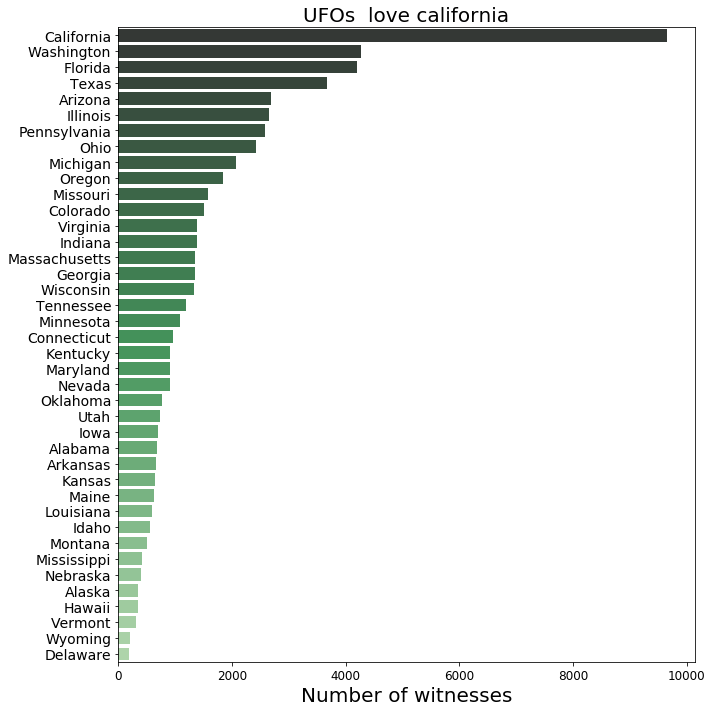

In [54]:
plt.figure(figsize=(10,10))
sns.barplot(temp,temp.index,palette="Greens_d")
plt.yticks(fontsize=14)
plt.xticks(fontsize=12)
plt.title('UFOs  love california',fontsize=20 )
plt.xlabel("Number of witnesses",fontsize=20)
plt.savefig("6_UFOs_love_California.png", fmt="png")
plt.savefig("6_UFOs_love_California.jpg", fmt="jpg")

# UFOs give a chance to be observed for about 1 minute.

1.this feature is rather skewed : we have many witnesses which observed UFO for about more than 24 hours<br>
2.dropping these outliers, we get rather nice distribution<br>
3.most people say round values of observing UFOs. Look at the 5, 10, 15, 20, 25, 30 values

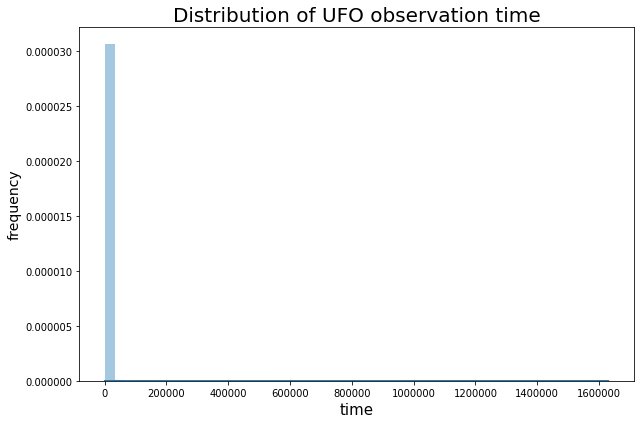

In [56]:
plt.figure(figsize=(9,6))
sns.distplot(ufo['duration_min'])

plt.title("Distribution of UFO observation time",fontsize=20)
plt.xlabel('time',fontsize=15)
plt.ylabel('frequency',fontsize=14)
plt.show()

In [57]:
ufo['duration_min'].mean()

150.28148360574346

In [58]:
ufo['duration_min'].std()

10336.946504858231

In [59]:
ufo['duration_min'].min()

1.6666666666666667e-05

In [60]:
ufo['duration_min'].max()/60

27176.666666666668

In [61]:
temp = ufo['duration_min']

In [62]:
temp = temp.sort_values()

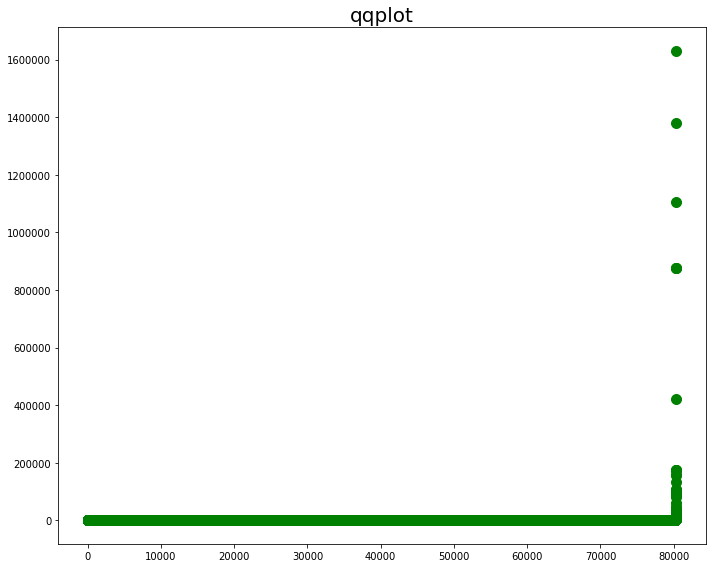

In [63]:
plt.figure(figsize=(10,8))
plt.scatter(range(1,len(temp)+1),temp.values,s=100,color='green')
plt.title('qqplot',fontsize=20)
plt.show()

In [64]:
q = ufo['duration_min'].quantile(0.95)

In [65]:
temp = temp[temp <q]

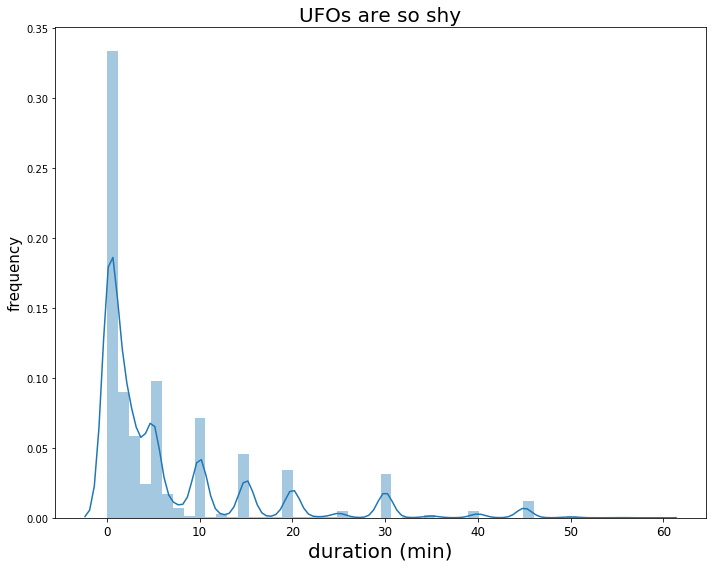

In [66]:
plt.figure(figsize=(10,8))
sns.distplot(temp)
plt.xlabel('duration (min)', fontsize=20)
plt.ylabel("frequency", fontsize=15)
plt.xticks(fontsize=12)
plt.title("UFOs are so shy", fontsize=20)

#plt.show()
plt.savefig("7_UFOs_are_so_shy.png", fmt="png")
plt.savefig("7_UFOs_are_so_shy.jpg", fmt="jpg")

In [67]:
ufo.columns

Index(['datetime', 'city', 'state', 'country', 'shape', 'comments',
       'longitude', 'latitude', 'longitude ', 'duration_sec', 'longitude',
       'duration_min', 'year'],
      dtype='object')

# Comments analysis 

People comment their UFO observation. We'll create word cloud using the text data from the the commments column

In [68]:
ufo['comments'] = ufo['comments'].astype(str)

In [69]:
text = ' '.join(ufo['comments'])

In [70]:
import re

In [71]:
text = re.sub('[!@#&44]','',text)
text = text.replace('Note','')
text = text.replace('quot','')

In [72]:
from wordcloud import WordCloud

In [73]:
from PIL import Image

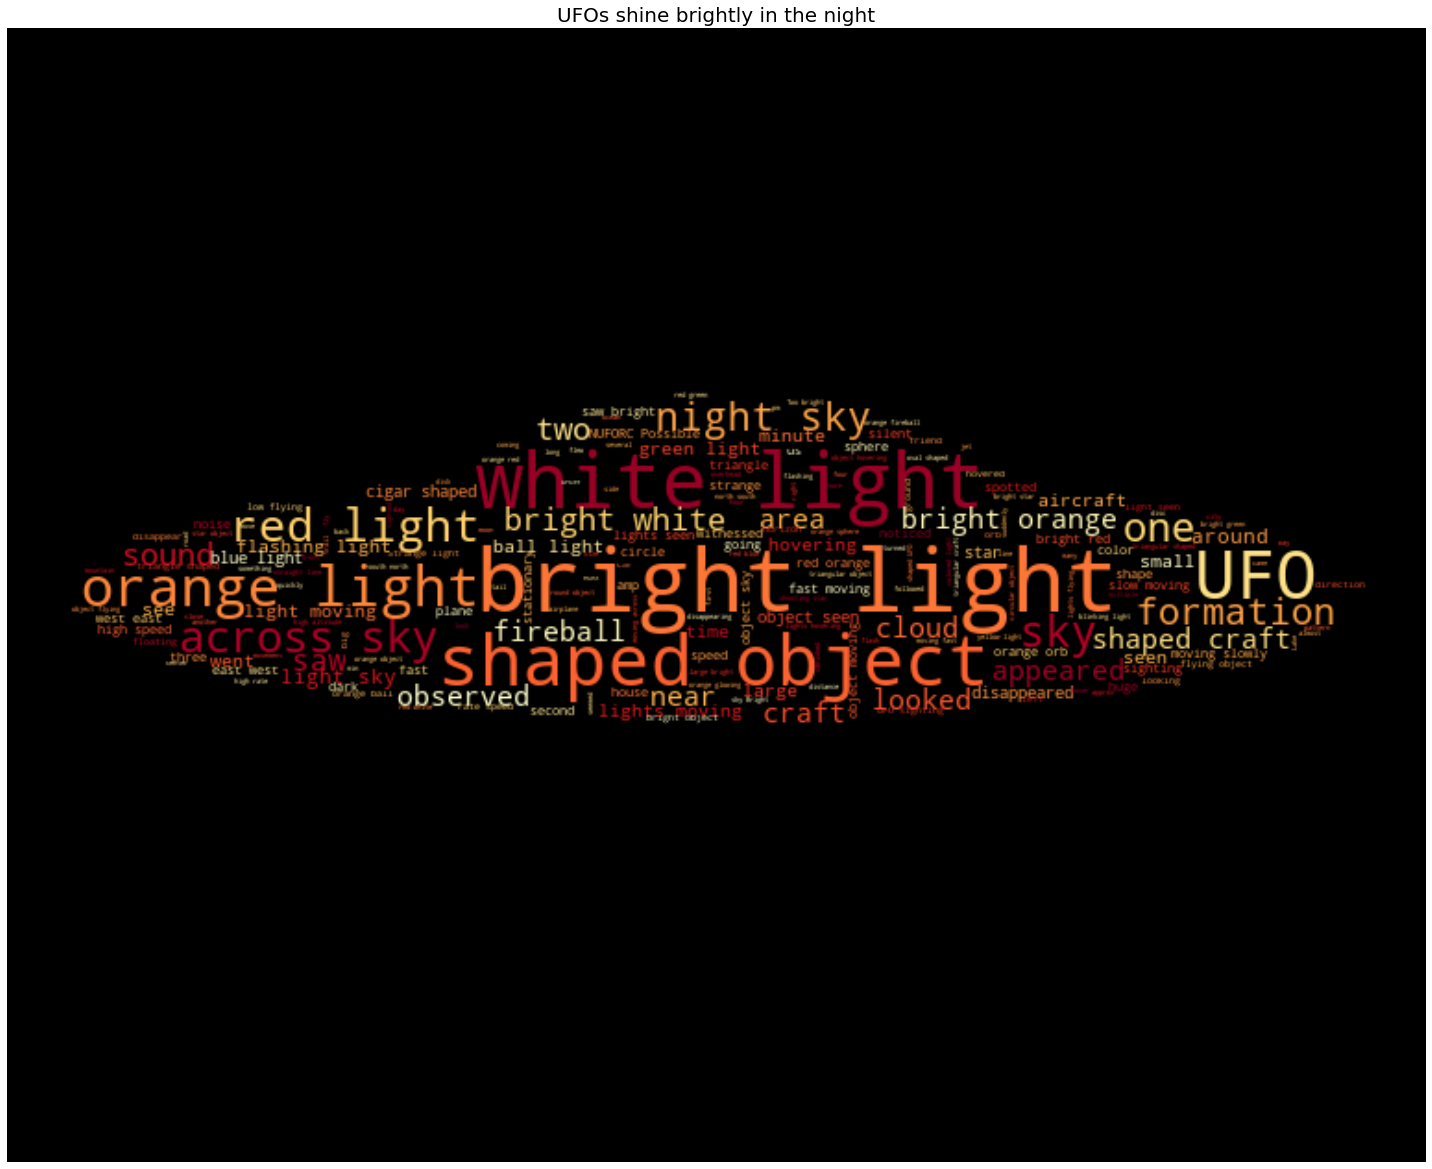

In [75]:
wave_mask = np.array(Image.open('./data/ufo_craft.jpg'))

wordcloud = WordCloud(width=480,height=480,margin=0,mask=wave_mask,colormap='YlOrRd').generate(text)

plt.figure(figsize=(20,20))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.margins(x=0,y=0)
plt.title('UFOs shine brightly in the night',fontsize=20)
plt.savefig("8_UFOs_shine_brightly.png", fmt="png")
plt.savefig("8_UFOs_shine_brightly.jpg", fmt="jpg")

# UFO likes summer and prefers to stay in the shadow

In [76]:
ufo['month'] = ufo['datetime'].dt.month.astype(int)
ufo['day'] = ufo['datetime'].dt.day.astype(int)
ufo['day of the week'] = ufo['datetime'].dt.dayofweek.astype(int)
ufo['hour'] = ufo['datetime'].dt.hour.astype(int)
ufo['day of year'] = ufo['datetime'].dt.hour.astype(int)

In [77]:
temp = ufo['day of the week'].value_counts()

In [78]:
temp.sort_index(inplace=True)

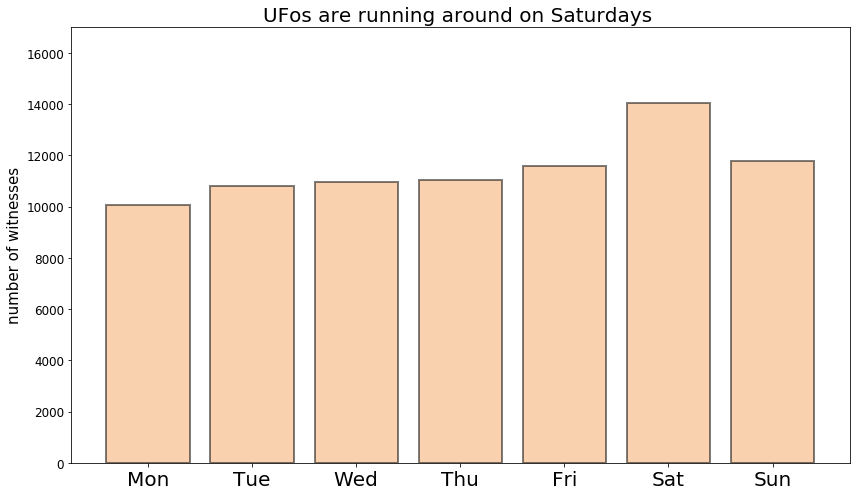

In [79]:
day_of_week = ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]
plt.figure(figsize=(12,7))
plt.bar(temp.index,temp,color="sandybrown",alpha=0.5,edgecolor="black",lw=2)
plt.xticks([0,1,2,3,4,5,6],day_of_week,fontsize=20)
plt.yticks(fontsize=12)
plt.title("UFos are running around on Saturdays ",fontsize=20)
plt.ylabel("number of witnesses",fontsize=15)
plt.ylim(0,17000)
plt.savefig("9_UFOs_are_runngin_around_on_saturdays.png", fmt="png")
plt.savefig("9_UFOs_are_runngin_around_on_saturdays.jpg", fmt="jpg")

In [80]:
temp = ufo['month'].value_counts()
temp.sort_index(inplace=True,ascending=False)

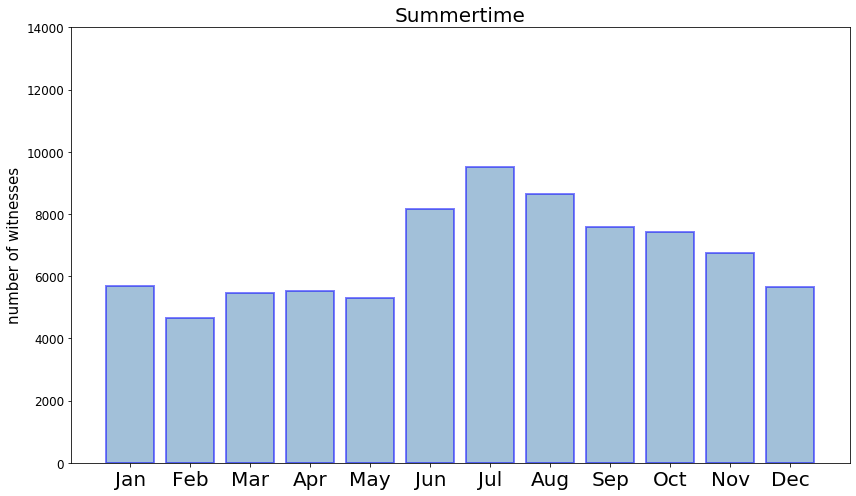

In [81]:
month = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
plt.figure(figsize=(12,7))
plt.bar(temp.index,temp,color="steelblue",alpha=0.5,edgecolor="blue",lw=2)
plt.xticks(list(range(1, 13)), month, fontsize=20)
plt.yticks(fontsize=12)
plt.title("Summertime", fontsize=20)
plt.ylabel("number of witnesses", fontsize=15)
plt.ylim(0, 14000)
#plt.show()
plt.savefig("10_summertime.png", fmt="png")
plt.savefig("10_summertime.jpg", fmt="jpg")

In [83]:
temp = ufo['hour'].value_counts()
temp.sort_index(inplace=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

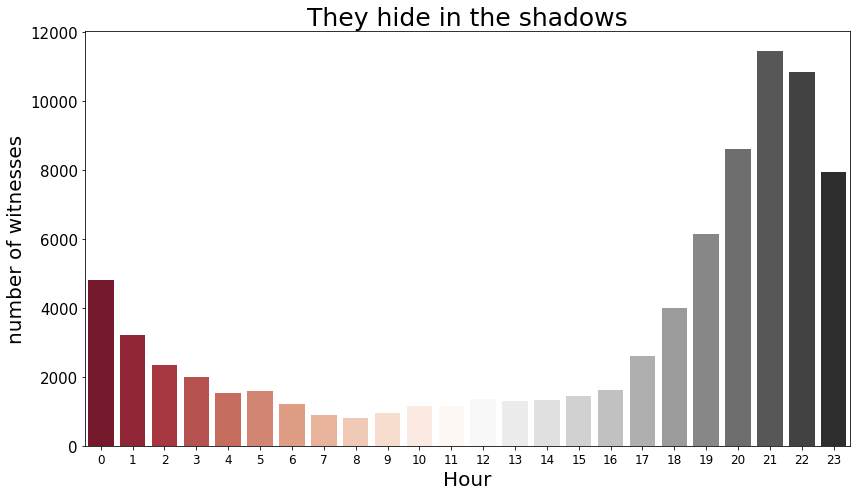

In [84]:
plt.figure(figsize=(12,7))
sns.barplot(temp.index,temp,palette="RdGy")
plt.xlabel("Hour",fontsize=20)
plt.ylabel("number of witnesses",fontsize=20)
plt.title("They hide in the shadows",fontsize=25)
plt.yticks(fontsize=15)
plt.xticks(fontsize=12)
